In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# a nice way of filtering out deprecated warnings
import warnings
warnings.filterwarnings("ignore")
df = pd.read_feather("../data/curated/taxi_add_weather_21.feather").drop("index",axis = 1)

In [3]:
#first think of weekend
start_date = "2021-08-01"
end_date = "2021-08-31"
after_start_date = df["DATE"] >= start_date
before_end_date = df["DATE"] <= end_date
between_two_dates = after_start_date & before_end_date
August= df.loc[between_two_dates]
August["DATE"] = August["tpep_pickup_datetime"].str[5:10]
date_count = August["DATE"].value_counts().sort_index()


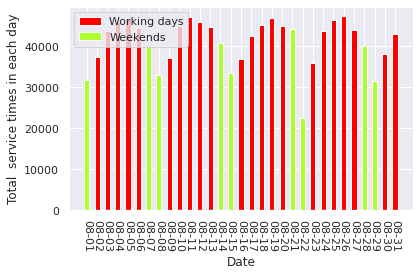

In [63]:
weekend_count = date_count
for i in range(len(weekend_count)):
    if weekend_count.index[i] not in["08-01","08-07","08-08","08-14","08-15","08-21","08-22","08-28","08-29"]:
        weekend_count[weekend_count.index[i]] = 0
labels = date_count.index
date_count = August["DATE"].value_counts().sort_index()
x = np.arange(len(labels))

width = 0.5

fig,ax = plt.subplots()
work_bar = ax.bar(x,date_count,width,color="red",label = "Working days")
weekend_bar = ax.bar(x,weekend_count,width,color="greenyellow",label = "Weekends")

ax.set_ylabel("Total  service times in each day")
ax.set_xticks(x)
ax.set_xlabel("Date")
ax.set_xticklabels(labels)
ax.legend()
plt.xticks(rotation = 270)
fig.tight_layout()
plt.show()

In [11]:
August

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,tip_amount,total_amount,...,DATE,avg_wind_speed,Rainfall,SNOW,Snow_depth,Max_temp,Min_temp,Thunder,WEEKDAY,weekend
1482992,2021-08-01 00:11:59,2021-08-01 00:17:15,1.0,0.55,1.0,263,140,5.0,1.76,10.56,...,08-01,0.00,0.17,0.0,0.0,45,34,0.0,6,True
1482993,2021-08-01 00:08:46,2021-08-01 00:30:40,1.0,5.63,1.0,234,238,20.5,4.86,29.16,...,08-01,0.00,0.17,0.0,0.0,45,34,0.0,6,True
1482994,2021-08-01 00:37:07,2021-08-01 00:49:50,1.0,2.30,1.0,239,262,10.5,2.86,17.16,...,08-01,0.00,0.17,0.0,0.0,45,34,0.0,6,True
1482995,2021-08-01 00:54:32,2021-08-01 01:00:17,1.0,1.22,1.0,244,152,6.5,0.00,7.80,...,08-01,0.00,0.17,0.0,0.0,45,34,0.0,6,True
1482996,2021-08-01 00:04:42,2021-08-01 00:27:33,1.0,4.55,1.0,239,211,17.5,0.00,21.30,...,08-01,0.00,0.17,0.0,0.0,45,34,0.0,6,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2752692,2021-08-31 23:03:34,2021-08-31 23:45:27,1.0,17.94,2.0,132,229,52.0,11.31,67.86,...,08-31,5.82,0.00,0.0,0.0,81,69,0.0,1,False
2752693,2021-08-31 23:14:44,2021-08-31 23:41:54,1.0,20.19,2.0,132,170,52.0,12.62,75.72,...,08-31,5.82,0.00,0.0,0.0,81,69,0.0,1,False
2752694,2021-08-31 23:01:30,2021-08-31 23:35:18,1.0,17.71,2.0,132,164,52.0,7.50,70.17,...,08-31,5.82,0.00,0.0,0.0,81,69,0.0,1,False
2752695,2021-08-31 23:19:35,2021-08-31 23:51:47,1.0,19.89,2.0,132,263,52.0,16.80,79.90,...,08-31,5.82,0.00,0.0,0.0,81,69,0.0,1,False


In [93]:
#think of the rain
rain_days = August[August["Rainfall"]>0].groupby("DATE").count()

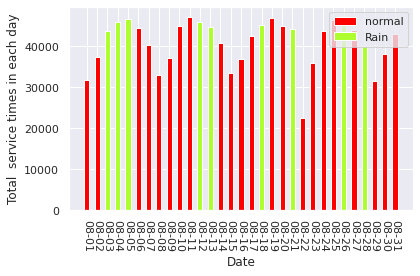

In [94]:
rain_count = date_count
for i in range(len(rain_count)):
    if rain_count.index[i] not in["08-03","08-04","08-05","08-12","08-13","08-18","08-21","08-26","08-28"]:
        rain_count[rain_count.index[i]] = 0
labels = date_count.index
date_count = August["DATE"].value_counts().sort_index()
x = np.arange(len(labels))

width = 0.5

fig,ax = plt.subplots()
normal_bar = ax.bar(x,date_count,width,color="red",label = "normal")
rain_bar = ax.bar(x,rain_count,width,color="greenyellow",label = "Rain")

ax.set_ylabel("Total  service times in each day")
ax.set_xticks(x)
ax.set_xlabel("Date")
ax.set_xticklabels(labels)
ax.legend()
plt.xticks(rotation = 270)
fig.tight_layout()
plt.show()

In [21]:
#think of the high temperature
date_count = August["DATE"].value_counts().sort_index()
hot_days = August[August["Max_temp"]>85].groupby("DATE").count()
hot_days

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,tip_amount,total_amount,...,final_amount,avg_wind_speed,Rainfall,SNOW,Snow_depth,Max_temp,Min_temp,Thunder,WEEKDAY,weekend
DATE,,,,,,,,,,,,,,,,,,,,,
08-17,42448,42448,42448,42448,42448,42448,42448,42448,42448,42448,...,42448,42448,42448,42448,42448,42448,42448,42448,42448,42448
08-18,45075,45075,45075,45075,45075,45075,45075,45075,45075,45075,...,45075,45075,45075,45075,45075,45075,45075,45075,45075,45075
08-19,46737,46737,46737,46737,46737,46737,46737,46737,46737,46737,...,46737,46737,46737,46737,46737,46737,46737,46737,46737,46737
08-20,44838,44838,44838,44838,44838,44838,44838,44838,44838,44838,...,44838,44838,44838,44838,44838,44838,44838,44838,44838,44838
08-21,44265,44265,44265,44265,44265,44265,44265,44265,44265,44265,...,44265,44265,44265,44265,44265,44265,44265,44265,44265,44265
08-22,22505,22505,22505,22505,22505,22505,22505,22505,22505,22505,...,22505,22505,22505,22505,22505,22505,22505,22505,22505,22505
08-30,38182,38182,38182,38182,38182,38182,38182,38182,38182,38182,...,38182,38182,38182,38182,38182,38182,38182,38182,38182,38182


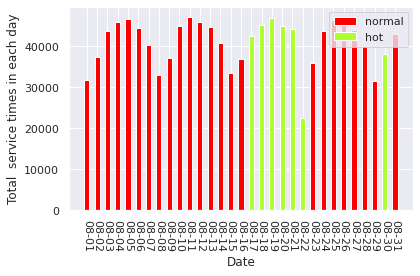

In [65]:
# when the minimal temperature of the day is lower than 90F,sign it as hot day.
hot_count = date_count
for i in range(len(hot_count)):
    if hot_count.index[i] not in["08-17","08-18","08-19","08-20","08-21","08-22","08-30"]:
        hot_count[hot_count.index[i]] = 0
labels = date_count.index
date_count = August["DATE"].value_counts().sort_index()
x = np.arange(len(labels))

width = 0.5

fig,ax = plt.subplots()
normal_bar = ax.bar(x,date_count,width,color="red",label = "normal")
rain_bar = ax.bar(x,hot_count,width,color="greenyellow",label = "hot")

ax.set_ylabel("Total  service times in each day")
ax.set_xticks(x)
ax.set_xlabel("Date")
ax.set_xticklabels(labels)
ax.legend()
plt.xticks(rotation = 270)
fig.tight_layout()
plt.show()

In [24]:
#think of snow
start_date = "2021-01-01"
end_date = "2021-01-31"
after_start_date = df["DATE"] >= start_date
before_end_date = df["DATE"] <= end_date
between_two_dates = after_start_date & before_end_date
January = df.loc[between_two_dates]
January["DATE"] = January["tpep_pickup_datetime"].str[5:10]
date_count = January["DATE"].value_counts().sort_index()
snow_days = January[January["SNOW"]>0].groupby("DATE").count()
snow_days

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,tip_amount,total_amount,...,final_amount,avg_wind_speed,Rainfall,SNOW,Snow_depth,Max_temp,Min_temp,Thunder,WEEKDAY,weekend
DATE,,,,,,,,,,,,,,,,,,,,,
01-03,11910,11910,11910,11910,11910,11910,11910,11910,11910,11910,...,11910,11910,11910,11910,11910,11910,11910,11910,11910,11910
01-18,16994,16994,16994,16994,16994,16994,16994,16994,16994,16994,...,16994,16994,16994,16994,16994,16994,16994,16994,16994,16994
01-19,23525,23525,23525,23525,23525,23525,23525,23525,23525,23525,...,23525,23525,23525,23525,23525,23525,23525,23525,23525,23525
01-30,18349,18349,18349,18349,18349,18349,18349,18349,18349,18349,...,18349,18349,18349,18349,18349,18349,18349,18349,18349,18349


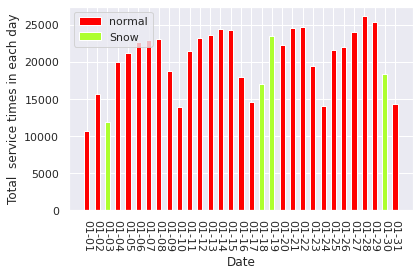

In [69]:
snow_count = date_count
for i in range(len(snow_count)):
    if snow_count.index[i] not in["01-03","01-18","01-19","01-30"]:
        snow_count[snow_count.index[i]] = 0
labels = date_count.index
date_count = January["DATE"].value_counts().sort_index()
x = np.arange(len(labels))

width = 0.5

fig,ax = plt.subplots()
normal_bar = ax.bar(x,date_count,width,color="red",label = "normal")
rain_bar = ax.bar(x,snow_count,width,color="greenyellow",label = "Snow")

ax.set_ylabel("Total  service times in each day")
ax.set_xticks(x)
ax.set_xlabel("Date")
ax.set_xticklabels(labels)
ax.legend()
plt.xticks(rotation = 270)
fig.tight_layout()
plt.show()

In [98]:
#think of the low temperature
date_count = January["DATE"].value_counts().sort_index()
cold_days = January[January["Min_temp"]<10].groupby("DATE").count()

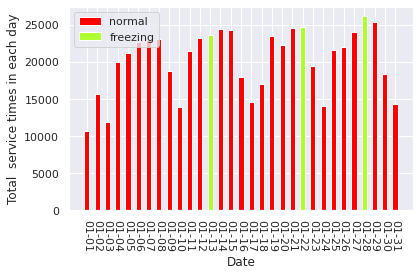

In [97]:
# when the minimal temperature of the day is lower than 14F,sign it as freezing day.
freezing_count = date_count
for i in range(len(freezing_count)):
    if freezing_count.index[i] not in["01-13","01-22","01-28"]:
        freezing_count[freezing_count.index[i]] = 0
labels = date_count.index
date_count = January["DATE"].value_counts().sort_index()
x = np.arange(len(labels))

width = 0.5

fig,ax = plt.subplots()
normal_bar = ax.bar(x,date_count,width,color="red",label = "normal")
rain_bar = ax.bar(x,freezing_count,width,color="greenyellow",label = "freezing")

ax.set_ylabel("Total  service times in each day")
ax.set_xticks(x)
ax.set_xlabel("Date")
ax.set_xticklabels(labels)
ax.legend()
plt.xticks(rotation = 270)
fig.tight_layout()
plt.show()

# Visualization of Taxi Service Hours

In [79]:
df = pd.read_feather("../data/curated/taxi_add_weather_21.feather").drop("index",axis = 1)
df = df.drop(columns = "final_amount")
#convert the pickup and dropoff date and time to  datetime64[ns]
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"])
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])

df["DATE"] = df["tpep_pickup_datetime"].dt.normalize()
df["hour"] = df["tpep_pickup_datetime"].dt.hour
df

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,tip_amount,total_amount,...,avg_wind_speed,Rainfall,SNOW,Snow_depth,Max_temp,Min_temp,Thunder,WEEKDAY,weekend,hour
0,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,68,33,16.5,4.06,24.36,...,0.00,0.06,0.0,0.0,58,39,0.0,4,False,0
1,2021-01-01 00:00:28,2021-01-01 00:17:28,1.0,4.10,1.0,95,157,16.0,0.00,17.30,...,0.00,0.06,0.0,0.0,58,39,0.0,4,False,0
2,2021-01-01 00:17:48,2021-01-01 00:21:55,1.0,1.01,1.0,236,237,5.5,1.00,10.30,...,0.00,0.06,0.0,0.0,58,39,0.0,4,False,0
3,2021-01-01 00:33:38,2021-01-01 00:38:37,1.0,0.73,1.0,142,239,5.5,2.79,12.09,...,0.00,0.06,0.0,0.0,58,39,0.0,4,False,0
4,2021-01-01 00:47:56,2021-01-01 00:52:53,1.0,1.17,1.0,238,166,6.5,2.06,12.36,...,0.00,0.06,0.0,0.0,58,39,0.0,4,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5811604,2021-12-30 23:47:52,2021-12-31 00:21:30,1.0,19.06,2.0,132,48,52.0,12.98,77.88,...,12.75,0.74,0.0,0.0,41,37,0.0,3,False,23
5811605,2021-12-30 23:16:17,2021-12-30 23:46:20,1.0,18.20,2.0,132,186,52.0,12.37,75.47,...,12.75,0.74,0.0,0.0,41,37,0.0,3,False,23
5811606,2021-12-30 23:29:58,2021-12-31 00:06:21,1.0,20.60,2.0,132,239,52.0,12.62,75.72,...,12.75,0.74,0.0,0.0,41,37,0.0,3,False,23
5811607,2021-12-30 23:58:31,2021-12-31 00:30:08,2.0,21.38,2.0,132,244,52.0,2.00,62.60,...,12.75,0.74,0.0,0.0,41,37,0.0,3,False,23


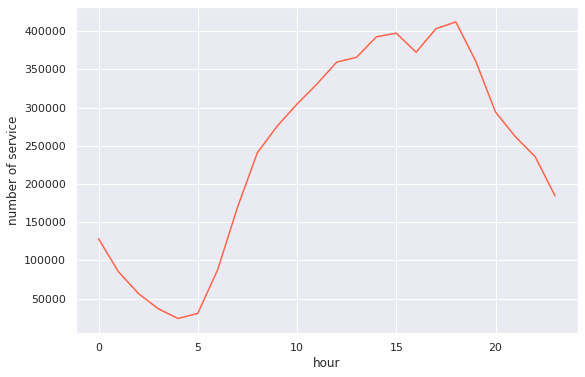

In [84]:
plt.figure(figsize = (9,6))
count = df.groupby("hour").count()["tpep_pickup_datetime"]
plt.plot(count.index,count,color = 'tomato')
plt.ylabel("number of service")
plt.xlabel("hour")
plt.show()

# Geospatial Visualization

In [48]:
df = pd.read_feather("../data/curated/taxi_add_weather_21.feather").drop("index",axis = 1)
# select the July
start_date = "2021-08-01"
end_date = "2021-08-31"
after_start_date = df["DATE"] >= start_date
before_end_date = df["DATE"] <= end_date
between_two_dates = after_start_date & before_end_date
August= df.loc[between_two_dates]
August["DATE"] = August["tpep_pickup_datetime"].str[5:10]
August

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,tip_amount,total_amount,...,DATE,avg_wind_speed,Rainfall,SNOW,Snow_depth,Max_temp,Min_temp,Thunder,WEEKDAY,weekend
1482992,2021-08-01 00:11:59,2021-08-01 00:17:15,1.0,0.55,1.0,263,140,5.0,1.76,10.56,...,08-01,0.00,0.17,0.0,0.0,45,34,0.0,6,True
1482993,2021-08-01 00:08:46,2021-08-01 00:30:40,1.0,5.63,1.0,234,238,20.5,4.86,29.16,...,08-01,0.00,0.17,0.0,0.0,45,34,0.0,6,True
1482994,2021-08-01 00:37:07,2021-08-01 00:49:50,1.0,2.30,1.0,239,262,10.5,2.86,17.16,...,08-01,0.00,0.17,0.0,0.0,45,34,0.0,6,True
1482995,2021-08-01 00:54:32,2021-08-01 01:00:17,1.0,1.22,1.0,244,152,6.5,0.00,7.80,...,08-01,0.00,0.17,0.0,0.0,45,34,0.0,6,True
1482996,2021-08-01 00:04:42,2021-08-01 00:27:33,1.0,4.55,1.0,239,211,17.5,0.00,21.30,...,08-01,0.00,0.17,0.0,0.0,45,34,0.0,6,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2752692,2021-08-31 23:03:34,2021-08-31 23:45:27,1.0,17.94,2.0,132,229,52.0,11.31,67.86,...,08-31,5.82,0.00,0.0,0.0,81,69,0.0,1,False
2752693,2021-08-31 23:14:44,2021-08-31 23:41:54,1.0,20.19,2.0,132,170,52.0,12.62,75.72,...,08-31,5.82,0.00,0.0,0.0,81,69,0.0,1,False
2752694,2021-08-31 23:01:30,2021-08-31 23:35:18,1.0,17.71,2.0,132,164,52.0,7.50,70.17,...,08-31,5.82,0.00,0.0,0.0,81,69,0.0,1,False
2752695,2021-08-31 23:19:35,2021-08-31 23:51:47,1.0,19.89,2.0,132,263,52.0,16.80,79.90,...,08-31,5.82,0.00,0.0,0.0,81,69,0.0,1,False


In [49]:
# pick the day of event
event = August[(August["DATE"]== "08-26")|(August["DATE"]== "08-27")]
clean = event[["tpep_pickup_datetime","tpep_dropoff_datetime","PULocationID","DOLocationID","total_amount"]]

#show the cleaned sample data
clean

,tpep_pickup_datetime,tpep_dropoff_datetime,PULocationID,DOLocationID,total_amount
2508744,2021-08-26 08:58:15,2021-08-26 09:05:11,100,234,12.36
2508745,2021-08-26 09:14:59,2021-08-26 09:50:48,234,24,29.80
2508746,2021-08-26 13:48:38,2021-08-26 14:00:23,170,79,12.30
2508747,2021-08-26 14:02:41,2021-08-26 14:28:27,79,43,22.80
2508748,2021-08-26 14:32:01,2021-08-26 14:43:18,237,141,14.76
...,...,...,...,...,...
2599897,2021-08-27 23:14:39,2021-08-28 00:08:43,249,132,66.36
2599898,2021-08-27 23:06:17,2021-08-27 23:39:20,132,236,75.72
2599899,2021-08-27 23:42:55,2021-08-28 00:18:21,132,79,67.86
2599900,2021-08-27 23:14:08,2021-08-27 23:46:28,132,79,75.72


In [102]:
event_coord = [40.79162297374497, -73.92685780906619]
enent_coordM = np.array(event_coord)
DO_count = clean["DOLocationID"].value_counts().sort_index()
DO_count = pd.DataFrame({"LocationID": DO_count.index,"DO_Count":DO_count})
#show the DO_count
DO_count

,LocationID,DO_Count
4,4,401
7,7,331
8,8,1
9,9,3
10,10,11
...,...,...
261,261,327
262,262,1380
263,263,2127
264,264,556


In [103]:
import geopandas as gpd

# sf stands for shape file
sf = gpd.read_file("../data/raw/taxi_zones/taxi_zones.shp")
zone = pd.read_csv("../data/raw/taxi_zones/taxi+_zone_lookup.csv")

# Convert the geometry shaape to to latitude and longitude
# Please attribute this if you are using it
sf['geometry'] = sf['geometry'].to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")
gdf = gpd.GeoDataFrame(pd.merge(DO_count, sf, left_on='LocationID', right_on='LocationID')).drop('LocationID',axis=1)

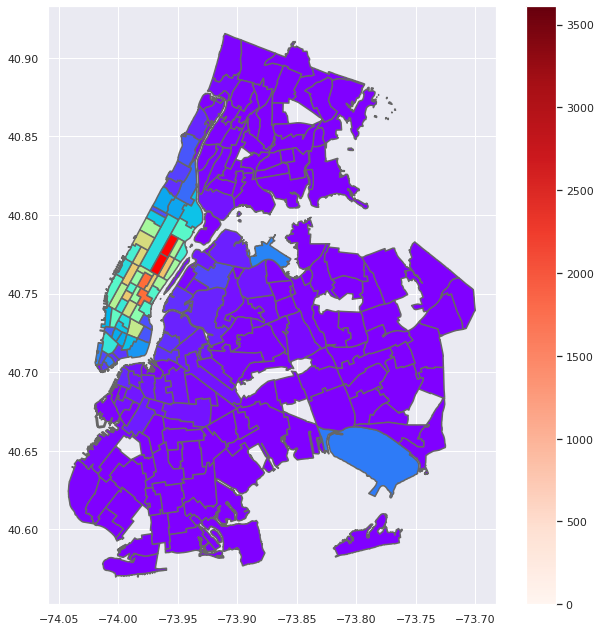

In [105]:
variable = "DO_Count"
vmin,vmax = 0,gdf["DO_Count"].max()
fig,ax = plt.subplots(1,figsize = (11,11))

sn = plt.cm.ScalarMappable(cmap="Reds",norm = plt.Normalize(vmin = vmin,vmax = vmax))

sn.set_array([])
fig.colorbar(sn)

gdf.plot(column = variable,cmap = "rainbow",lw =1.5,ax=ax,edgecolor="0.4")
plt.show()